In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set the path to the dataset folder
dataset_path = './train/'  # The 'train' folder contains cat and dog images

# Function to load images and assign labels (0 for cat, 1 for dog)
def load_images_from_folder(folder, max_images=None):
    images = []
    labels = []
    count = 0
    
    # Check if the folder exists
    if not os.path.exists(folder):
        print(f"Folder {folder} does not exist.")
        return np.array(images), np.array(labels)

    # List directories for cats and dogs
    cat_folder = os.path.join(folder, 'cats')
    dog_folder = os.path.join(folder, 'dogs')

    # Check if cat and dog folders exist
    if not os.path.exists(cat_folder) or not os.path.exists(dog_folder):
        print("Cat or dog folder is missing.")
        return np.array(images), np.array(labels)

    # Load images from the cats folder
    for filename in os.listdir(cat_folder):
        img_path = os.path.join(cat_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize image to 64x64 for uniformity
            images.append(img)
            labels.append(0)  # Label for cat
            count += 1
            if max_images is not None and count >= max_images:
                break

    # Load images from the dogs folder
    for filename in os.listdir(dog_folder):
        img_path = os.path.join(dog_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize image to 64x64 for uniformity
            images.append(img)
            labels.append(1)  # Label for dog
            count += 1
            if max_images is not None and count >= max_images:
                break

    print(f"Loaded {len(images)} images.")  # Print how many images were loaded
    return np.array(images), np.array(labels)

# Load a small subset of images (e.g., 200 images)
max_images = 200
images, labels = load_images_from_folder(dataset_path, max_images=max_images)

# Check if any images were loaded
if len(images) == 0:
    print("No images were loaded. Check the folder structure.")
else:
    # Check unique labels
    unique_labels = np.unique(labels)
    print(f"Unique labels: {unique_labels}")

    # Ensure at least two classes are present
    if len(unique_labels) < 2:
        print("Insufficient classes in the dataset. Ensure both cats and dogs are present.")
    else:
        # Reshape images to 2D (required by SVM)
        images = images.reshape(images.shape[0], -1)  # Flatten the images to 1D

        # Normalize pixel values (0-255) to (0-1) range
        images = images / 255.0

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

        # Train the SVM model
        svm = SVC(kernel='linear', C=1)  # Linear kernel SVM
        svm.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = svm.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy * 100:.2f}%")

        # Print classification report and confusion matrix
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Loaded 201 images.
Unique labels: [0 1]
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Confusion Matrix:
 [[41]]


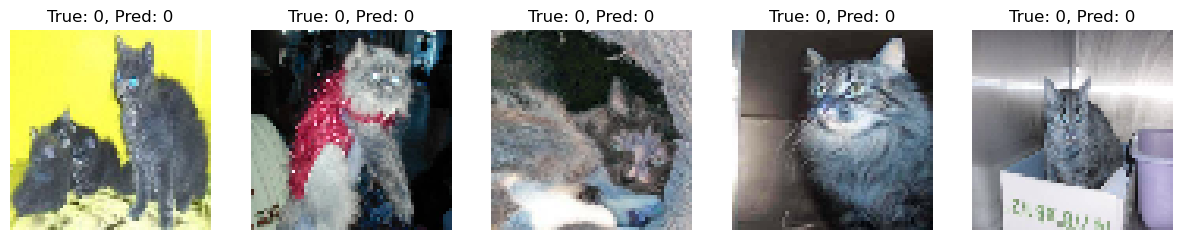

In [20]:
import matplotlib.pyplot as plt

# Visualize some predictions
def visualize_predictions(X, y_true, y_pred, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i].reshape(64, 64, 3))  # Reshape to original image size
        plt.title(f'True: {y_true[i]}, Pred: {y_pred[i]}')
        plt.axis('off')
    plt.show()

# Call the function to visualize the first 5 predictions
visualize_predictions(X_test, y_test, y_pred, num_images=5)
